# Python project - Analyzing Factors That Affect Laptop Pricing

Author: Duc Luong

Date: 26/11/2023


# Introduction

## Project Overview

This project is focused on analyzing laptop pricing. I aim to discover trends and factors that may influence the pricing of laptops.

## Objectives

The primary objectives of this analysis include:

- **Data exploration:** Import and obtain basic insights about the dataset.
- **Data wrangling:** Cleaning and enriching data.
- **Exploratory data analysis:** Visualize correlation and distributions of attributes and run descriptive statistical analysis.
- **Measure correlations and statistical significance:** Measure correlations between variables using Pearson Correlation and P-values.


## Scope

This analysis focuses on **laptop** models that are available in the dataset only. Several attributes such as brand name and specifications (CPU, RAM, screen size, etc.) will be analyzed.

## Dataset

Data for this analysis is publicly available on Kaggle: https://www.kaggle.com/datasets/arnabchaki/laptop-price-prediction/data?select=laptops_train.csv




<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_exploration">Data Exploration</a></li>
    <li><a href="#data_wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#measure_correlations">Correlations and statistical significance</a></li>
</ol>

</div>
 
<hr>

<h2 id="data_exploration">1. Data Exploration</h2>

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Import the dataset

In [2]:
path = './laptops_train.csv'
df = pd.read_csv(path)
df.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


Verify loading by checking columns, data type and number of rows.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


Check duplicated rows.

In [4]:
df[df.duplicated()]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price


Changing column names for ease of analysis.

In [5]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating_system',
       'operating_system_version', 'weight', 'price'],
      dtype='object')

<h2 id="data_wrangling">2. Data Wrangling</h>

Drop the following columns:
1. **operating_system_version**: This attribute contains a large number of missing values and is of little relevance to the analysis of laptop prices. OS versions can be updated over time by users.
2. **model_name**: This attribute has a large number of unique values and is difficult to categorize. This would make analysis complex without foreseeable benefits.
3. **storage**: Storage is normally configurable after purchase, except for laptops made by Apple. Additionally, it is rather complex due to different types and combinations. I decided to drop this column to make this analysis simpler.

In [6]:
df.drop(['operating_system_version', 'model_name', 'storage'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      977 non-null    object 
 1   category          977 non-null    object 
 2   screen_size       977 non-null    object 
 3   screen            977 non-null    object 
 4   cpu               977 non-null    object 
 5   ram               977 non-null    object 
 6   gpu               977 non-null    object 
 7   operating_system  977 non-null    object 
 8   weight            977 non-null    object 
 9   price             977 non-null    float64
dtypes: float64(1), object(9)
memory usage: 76.5+ KB


Converting values in 'price' column from INR (Indian Rupee) to USD.

1 INR = 0.012 USD

Laptop prices in the dataset is 100 times larger than their actual value. This error is addressed in the calculation below.

In [7]:
# Convert INR to USD and correct the price values
df.price = (df.price * 0.00012).astype('int')

# Change column name to indicate column unit
df.rename(columns={'price':'price_usd'}, inplace=True)

df['price_usd'].head()

0    1429
1     959
2     613
3    2707
4    1924
Name: price_usd, dtype: int32

Change the data type of 'weight' to float.

In [8]:
# Stripping 'kg' from each value, then change type to 'float'
df['weight'] = df['weight'].str.replace("kg", "").astype("float")

# Change column name to indicate column unit
df.rename(columns={'weight':'weight_kg'}, inplace=True)

df['weight_kg'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: weight_kg, dtype: float64

Change the data type of 'ram' to int.

In [9]:
# Stripping 'GB' from each value, then change type to 'int64'
df['ram'] = df['ram'].str.replace('GB', '').astype('int64')

# Change column name to indicate column unit
df.rename(columns={'ram':'ram_gb'}, inplace=True)

df['ram_gb'].value_counts()

ram_gb
8     483
4     271
16    149
6      24
12     21
32     16
2      10
24      3
Name: count, dtype: int64

Change the data type of 'screen_size' to float.

In [10]:
df['screen_size'] = df['screen_size'].str.replace('"', '').astype('float')
df['screen_size'].nunique()

18

As there are many different screen sizes. I create a new column to categorize screen sizes into three types:
1. **Small**: under 14 inches.
2. **Medium**: 14 to under 16 inches.
3. **Large**: 16 inches and above.

Text(0, 0.5, 'Count')

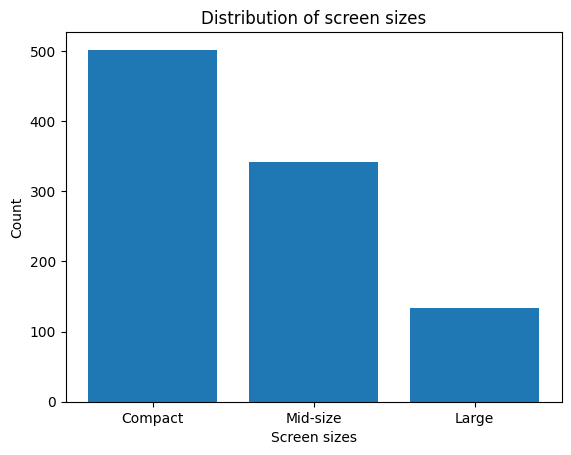

In [11]:
# Creating bins and headers:
bins = [0, 14, 16, float('inf')]
lables = ['Compact', 'Mid-size', 'Large']

df['screen_size_category'] = pd.cut(df['screen_size'], bins=bins, labels=lables, include_lowest=True)

# Plotting screen size categories count
plt.bar(df['screen_size_category'].unique(), df['screen_size_category'].value_counts())
plt.title('Distribution of screen sizes')
plt.xlabel("Screen sizes")
plt.ylabel("Count")

Next, extract the screen resolution from 'screen' column. I decided to extract screen resolution only because the information is available on all rows. Touchscreen and Panel type are not extracted as the data may be insufficient.

In [12]:
# Define a pattern to extract
pattern = r'(\d+x\d+)'

# Extracting resolution from the 'screen' column and overwrite it. Then rename the column to 'screen_resolution'.
df['screen_resolution'] = df['screen'].str.extract(pattern)
print(df['screen_resolution'].value_counts())
print("Unique values:", df['screen_resolution'].nunique())

screen_resolution
1920x1080    655
1366x768     206
3840x2160     36
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: count, dtype: int64
Unique values: 15


As there are many resolution types, I groupby the 'screen_resolution' to look for possible ways to categorize.

In [13]:
df.groupby(['screen_resolution', 'screen'])['screen'].count()

screen_resolution  screen                                       
1366x768           1366x768                                         180
                   IPS Panel 1366x768                                 7
                   IPS Panel Full HD 1366x768                         1
                   IPS Panel Touchscreen 1366x768                     3
                   Touchscreen 1366x768                              15
1440x900           1440x900                                           4
1600x900           1600x900                                          19
1920x1080          1920x1080                                          3
                   Full HD / Touchscreen 1920x1080                   38
                   Full HD 1920x1080                                397
                   IPS Panel Full HD / Touchscreen 1920x1080         35
                   IPS Panel Full HD 1920x1080                      181
                   Touchscreen / Full HD 1920x1080                    1

From the output and based on references of industry standards, I decided to group screen resolutions as follows, using the **vertical pixel** number (the number on the right side of letter 'x' in screen resolution):

1. **HD**: vertical pixels less than 1080
2. **Full HD**: vertical pixels from 1080 to less than 1440
3. **Quad HD**: vertical pixels from 1440 to less than 2160
4. **Ultra HD**: vertical pixels equal to or larger than 2160
5. **Above 5K and above**: vertical pixels equal to or larger than 2880

Note that this method of grouping is only applicable for this dataset and may produce incorrect results if applied to other screen types.

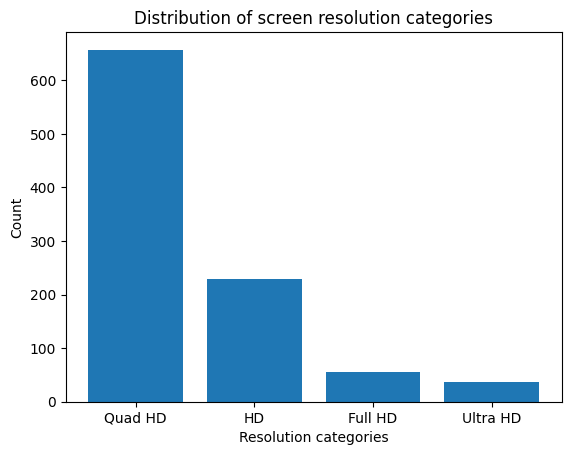

In [14]:
# Defining a function to categorize screen resolutions
def categorize_screen_res(v_pixel):
    if v_pixel < 1080:
        return 'HD'
    elif v_pixel < 1440:
        return 'Full HD'
    elif v_pixel < 2160:
        return 'Quad HD'
    elif v_pixel < 2880:
        return 'Ultra HD'
    elif v_pixel >= 2880:
        return '5K and above'

# Extract vertical pixels from resolution
v_pixel_pattern = r'\d+x(\d+)'
df['v_pixels'] = df['screen_resolution'].str.extract(v_pixel_pattern).astype('int64')

# Apply custom function to the extracted vertical pixels
df['resolution_category'] = df['v_pixels'].apply(categorize_screen_res)

# Plotting screen categories to check its distributions
plt.bar(df['resolution_category'].unique(), df['resolution_category'].value_counts())
plt.title("Distribution of screen resolution categories")
plt.xlabel("Resolution categories")
plt.ylabel("Count")
plt.show()


Dropping unnessary columns.

In [15]:
df = df[['manufacturer', 'category', 'screen_size', 
         # 'screen', 
         'cpu', 'ram_gb', 'gpu', 'operating_system', 'weight_kg', 'price_usd', 'screen_size_category',
         # 'screen_resolution', 'v_pixels',
         'resolution_category']]

df.head(5)

,manufacturer,category,screen_size,cpu,ram_gb,gpu,operating_system,weight_kg,price_usd,screen_size_category,resolution_category
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1429,Compact,Quad HD
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,959,Compact,HD
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,613,Mid-size,Full HD
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2707,Mid-size,Quad HD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1924,Compact,Quad HD


Since the are many different versions of GPU to be considered. I decided to extract only the gpu manufacturer name for this analysis.

In [16]:
df['gpu'] = df['gpu'].str.split().str[0]
df.rename(columns={'gpu':'gpu_manufacturer'}, inplace=True)

df['gpu_manufacturer'].value_counts()

gpu_manufacturer
Intel     525
Nvidia    310
AMD       142
Name: count, dtype: int64

Typically, CPU clock speed is a good measurement the processing power of the CPU. Additionally, it is likely that newer generations of CPU will have higher clock speed than earlier generations. Thus, I opted to analyze only the clock speed for the ease of comparison between various generations, manufacturers, and types.

In [17]:
# Extract CPU speed from the 'cpu' column.
df['cpu_speed_ghz'] = df['cpu'].str.split().str[-1]

# Stripping 'GHz' from each value, then change type to 'float'
df['cpu_speed_ghz'] = df['cpu_speed_ghz'].str.replace('GHz', '').astype('float')

# Dropping the 'cpu' column.
df.drop('cpu', axis=1, inplace=True)

df['cpu_speed_ghz'].head(5)

0    2.3
1    1.8
2    2.5
3    2.7
4    3.1
Name: cpu_speed_ghz, dtype: float64

We now have the completed table ready for analysis.

In [18]:
df.head()

,manufacturer,category,screen_size,ram_gb,gpu_manufacturer,operating_system,weight_kg,price_usd,screen_size_category,resolution_category,cpu_speed_ghz
0,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,1429,Compact,Quad HD,2.3
1,Apple,Ultrabook,13.3,8,Intel,macOS,1.34,959,Compact,HD,1.8
2,HP,Notebook,15.6,8,Intel,No OS,1.86,613,Mid-size,Full HD,2.5
3,Apple,Ultrabook,15.4,16,AMD,macOS,1.83,2707,Mid-size,Quad HD,2.7
4,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,1924,Compact,Quad HD,3.1


Run some summary statistics and having a final look at the data.

In [19]:
df.describe(include='all')

,manufacturer,category,screen_size,ram_gb,gpu_manufacturer,operating_system,weight_kg,price_usd,screen_size_category,resolution_category,cpu_speed_ghz
count,977,977,977.00000,977.000000,977,977,977.000000,977.000000,977,977,977.000000
unique,19,6,NaN,NaN,3,7,NaN,NaN,3,4,NaN
top,Dell,Notebook,NaN,NaN,Intel,Windows,NaN,NaN,Mid-size,Full HD,NaN
freq,232,549,NaN,NaN,525,837,NaN,NaN,502,657,NaN
mean,NaN,NaN,15.05261,8.528147,NaN,NaN,2.039128,1201.787103,NaN,NaN,2.284033
std,NaN,NaN,1.41895,4.997487,NaN,NaN,0.666009,756.755206,NaN,NaN,0.523576
min,NaN,NaN,10.10000,2.000000,NaN,NaN,0.690000,204.000000,NaN,NaN,0.900000
25%,NaN,NaN,14.00000,4.000000,NaN,NaN,1.500000,639.000000,NaN,NaN,1.800000
50%,NaN,NaN,15.60000,8.000000,NaN,NaN,2.020000,1023.000000,NaN,NaN,2.500000
75%,NaN,NaN,15.60000,8.000000,NaN,NaN,2.300000,1573.000000,NaN,NaN,2.700000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   manufacturer          977 non-null    object  
 1   category              977 non-null    object  
 2   screen_size           977 non-null    float64 
 3   ram_gb                977 non-null    int64   
 4   gpu_manufacturer      977 non-null    object  
 5   operating_system      977 non-null    object  
 6   weight_kg             977 non-null    float64 
 7   price_usd             977 non-null    int32   
 8   screen_size_category  977 non-null    category
 9   resolution_category   977 non-null    object  
 10  cpu_speed_ghz         977 non-null    float64 
dtypes: category(1), float64(3), int32(1), int64(1), object(5)
memory usage: 73.7+ KB


<h2 id="eda">3. Exploratory Data Analysis</h>

## Visualize individual feature patterns

### Continuous valued features
Generate a regression plot for each of the continuous valued features.

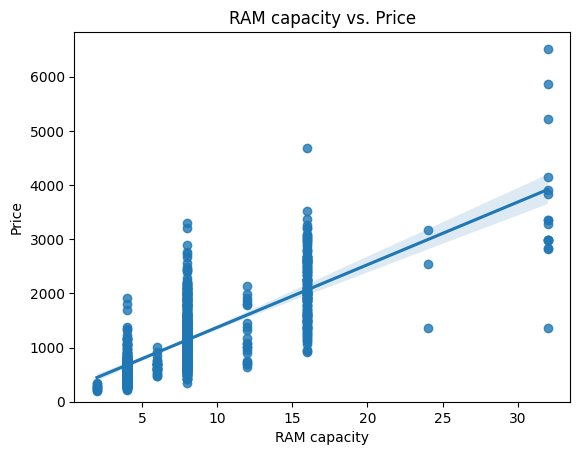

In [21]:
sns.regplot(x='ram_gb', y='price_usd', data=df)
plt.ylim(0)
plt.title("RAM capacity vs. Price")
plt.xlabel("RAM capacity")
plt.ylabel("Price")
plt.show()

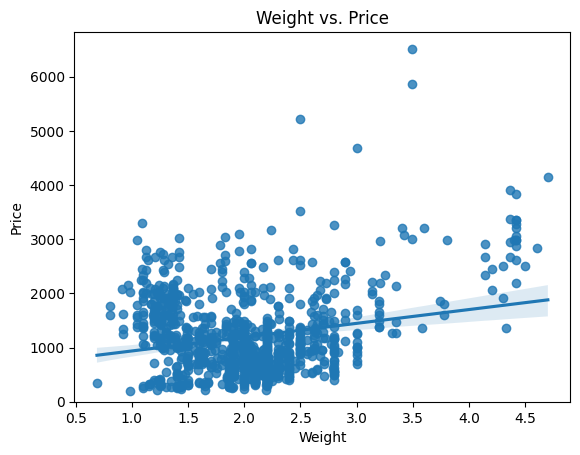

In [22]:
sns.regplot(x='weight_kg', y='price_usd', data=df)
plt.ylim(0)
plt.title("Weight vs. Price")
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

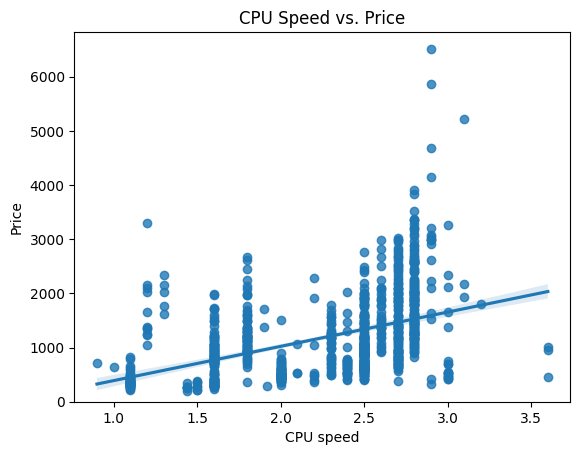

In [23]:
sns.regplot(x='cpu_speed_ghz', y='price_usd', data=df)
plt.ylim(0)
plt.title("CPU Speed vs. Price")
plt.xlabel("CPU speed")
plt.ylabel("Price")
plt.show()

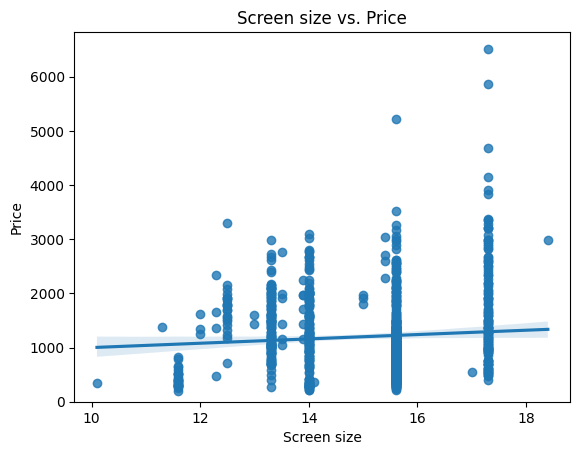

In [24]:
sns.regplot(x='screen_size', y='price_usd', data=df)
plt.ylim(0)
plt.title("Screen size vs. Price")
plt.xlabel("Screen size")
plt.ylabel("Price")
plt.show()

Find the correlation of the three attributes with 'price'.

In [25]:
df_cont_corr = df[['ram_gb', 'weight_kg', 'cpu_speed_ghz', 'screen_size','price_usd']].corr()
df_cont_corr

,ram_gb,weight_kg,cpu_speed_ghz,screen_size,price_usd
ram_gb,1.000000,0.390161,0.374067,0.232315,0.763995
weight_kg,0.390161,1.000000,0.315575,0.822261,0.224392
cpu_speed_ghz,0.374067,0.315575,1.000000,0.299061,0.437619
screen_size,0.232315,0.822261,0.299061,1.000000,0.075127
price_usd,0.763995,0.224392,0.437619,0.075127,1.000000


Generate a heatmap to visualize correlation between ram, weight, and CPU speed with 'price'.

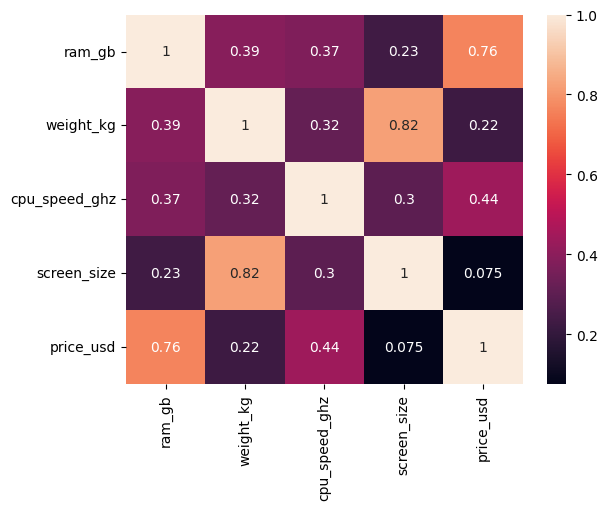

In [26]:
sns.heatmap(df_cont_corr, annot=True)
plt.show()

Interpretation:

- There is a strong positive correlation (0.76) between **RAM capacity** and laptop price. This indicates that as the RAM capacity increases, the price of the laptop tends to increase.
- **CPU speed** has a moderate positive correlation (0.44) with laptop price. Laptops with higher CPU speed tend to have higher prices.
- There is a weak positive correlation (0.22) between **weight** and laptop price. This indicates that heavier laptops might be more expensive.
- There is a very weak positive correlation between **screen size** and price (0.075) indicating almost no correlation between the two features.
- Interestingly, there is a very strong positive correlation (0.82) between **weight** and **screen size**. This suggests that the laptop will tend to weight heavier when the screen size is larger. However, this information is not within the scope of this analysis.

### Categorical features

Generate a box plot for each of the categorical features.

In [27]:
cat_features = ['manufacturer', 'category', 'gpu_manufacturer', 
                'operating_system', 'screen_size_category', 'resolution_category']

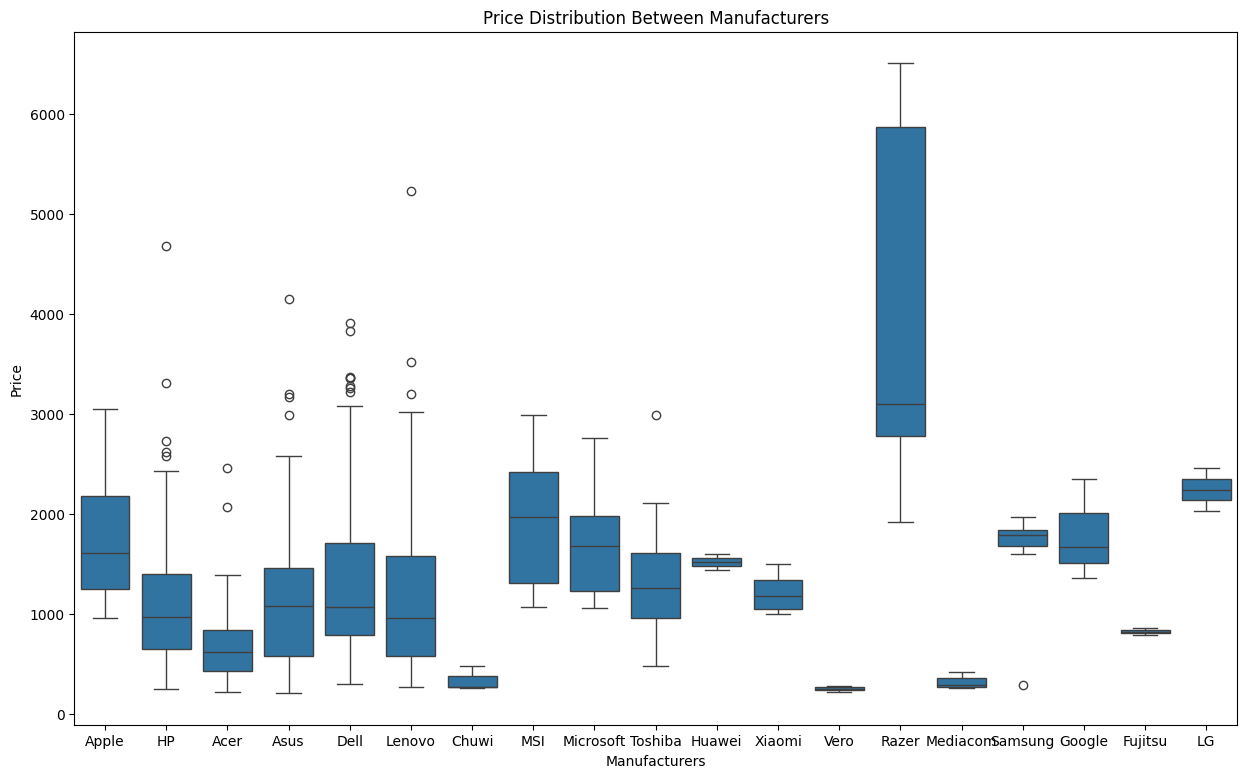

In [28]:
plt.figure(figsize=(15, 9))
sns.boxplot(x=cat_features[0], y='price_usd', data=df)
plt.title("Price Distribution Between Manufacturers")
plt.xlabel("Manufacturers")
plt.ylabel("Price")
plt.show()

- There's a notable difference between the distribution of laptop prices between Razer and the rest. Razer laptops prices are distributed at a significantly higher range than any other brands - between approximately 2000 USD to 6500 USD.
- As there are significant overlaps between price distributions of prices between laptop manufacturers, this would not be a good price predictor.

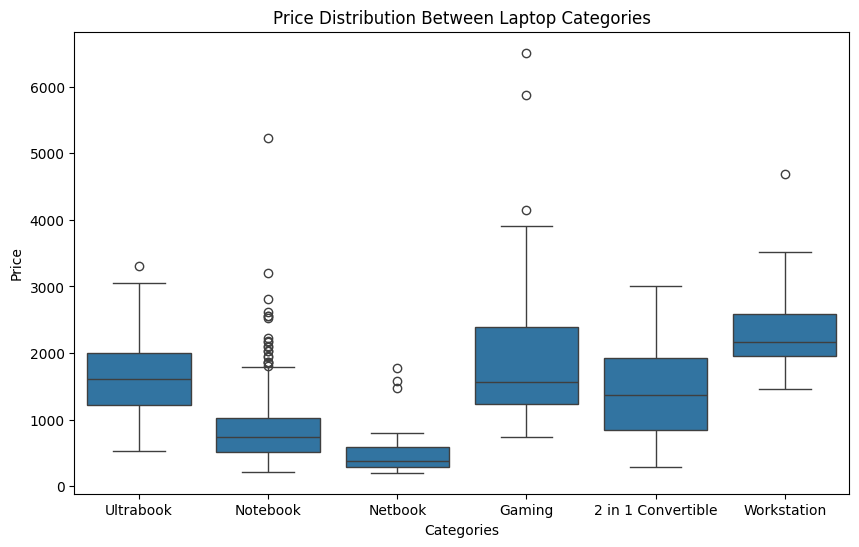

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cat_features[1], y='price_usd', data=df)
plt.title("Price Distribution Between Laptop Categories")
plt.xlabel("Categories")
plt.ylabel("Price")
plt.show()

The distribution of prices overlaps quite a lot between laptop categories. This will not be a good predictor of price. From this plot, only the price distribution between Netbook and Workstation laptop are clear.

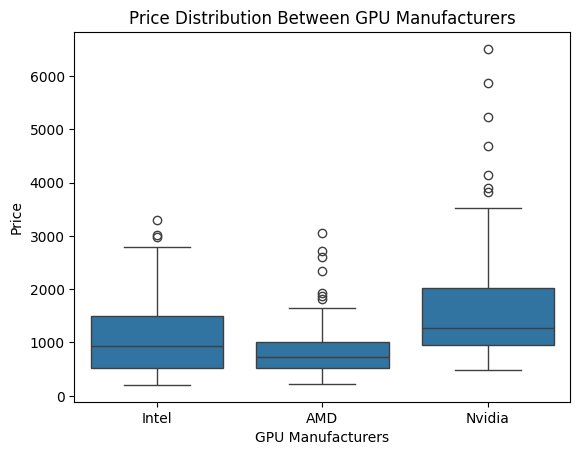

In [30]:
sns.boxplot(x=cat_features[2], y='price_usd', data=df)
plt.title("Price Distribution Between GPU Manufacturers")
plt.xlabel("GPU Manufacturers")
plt.ylabel("Price")
plt.show()

- Laptops powered by AMD GPUs have a more compact range of price distributions than Nvidia counterpart. Laptops with AMD GPUs are also distributed at a lower price range than NVIDIA.
- Laptops using Intel GPU have a wide range of price distribution that overlaps with Nvidia powered laptops.

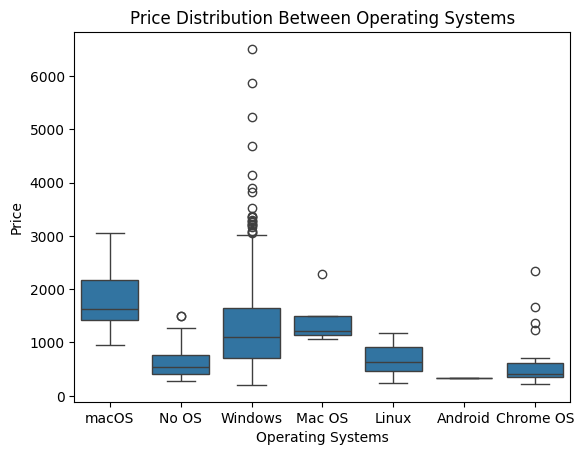

In [31]:
sns.boxplot(x=cat_features[3], y='price_usd', data=df)
plt.title("Price Distribution Between Operating Systems")
plt.xlabel("Operating Systems")
plt.ylabel("Price")
plt.show()

- Windows laptops price distribution is very wide, overlapping the price distributions of all other Operating Systems.
- A large percentage of laptops preinstalled with macOS, Windows operating systems are priced higher than other systems. However, this would not be a good predictor of price.

Note for future revision: 
- The Operating Systems can potentially be updated to reduce the number of categories to three value: macOS, Windows, and others (no OS, Linux, Android, and Chrome OS).
- Mac OS (last released in 2015) is an older version of macOS. Apple has stopped providing support for this operating system. Thus laptop models using Mac OS can be removed to improve the accuracy of this analysis.

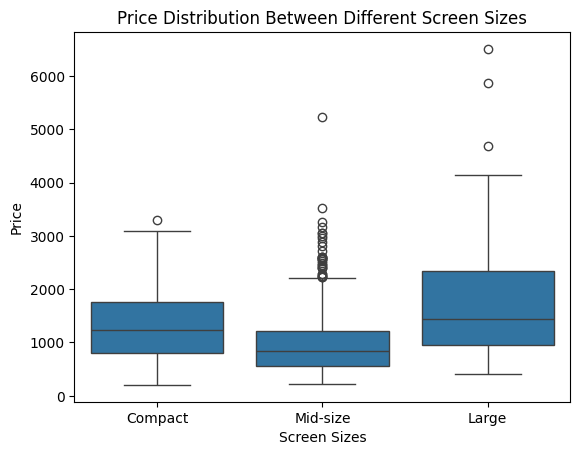

In [32]:
sns.boxplot(x=cat_features[4], y='price_usd', data=df)
plt.title("Price Distribution Between Different Screen Sizes")
plt.xlabel("Screen Sizes")
plt.ylabel("Price")
plt.show()

Distributions of prices between screen size have significant overlaps with each other. This is not a good price predictor.

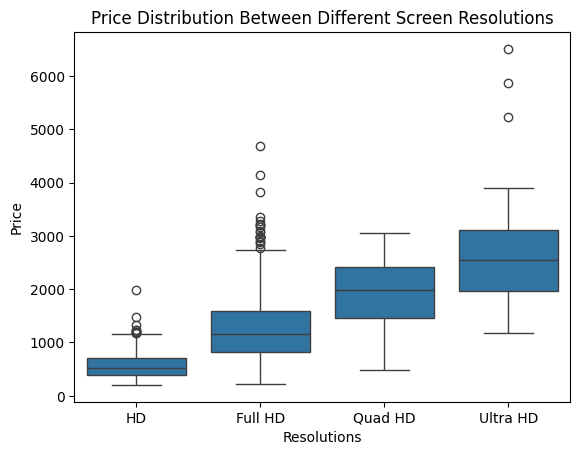

In [33]:
sns.boxplot(x=cat_features[5], y='price_usd', data=df, order=['HD', 'Full HD', 'Quad HD', 'Ultra HD'])
plt.title("Price Distribution Between Different Screen Resolutions")
plt.xlabel("Resolutions")
plt.ylabel("Price")
plt.show()

Although not distinctive, the difference in median prices suggests that laptops with higher screen resolutions tends to be priced higer. This feature should be futher reviewed as a potential price predictor.

Note for future revisions:
- Screen resolution has a natural ordering. It can be mapped into numerical values to calculate the Pearson correlation.

<h2 id="measure_correlations">4. Correlations and statistical significance</h2>

Calculate the Pearson Correlation and P-value to indicate a potential price predictor for laptops.

In [34]:
data = []

for param in [# 'manufacturer', 'category', 
              'screen_size', 'ram_gb', 
              # 'gpu_manufacturer', 'operating_system', 
              'weight_kg', # 'screen_size_category', 
              # 'resolution_category', 
              'cpu_speed_ghz']:
    pearson_coeff, p_value = stats.pearsonr(df[param], df['price_usd'])
    data.append([param, pearson_coeff, p_value])

df_corr = pd.DataFrame(data, columns=['feature', 'pearson_coeff', 'p_value'])
df_corr

,feature,pearson_coeff,p_value
0,screen_size,0.075127,1.884646e-02
1,ram_gb,0.763995,9.787666e-188
2,weight_kg,0.224392,1.288700e-12
3,cpu_speed_ghz,0.437619,5.698227e-47


The p-value for RAM capacity is 9.787666e-188. This indicates that the correlation between RAM capacity and Price is statistically significant. The positive linear relationship between them is also strong (0.763995). This make RAM capacity a good indicator of laptop prices.
